In [17]:
# %load /Users/wayment/ipynb_defaults.py
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import sys,os


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [19]:
muts = [64, 68, 43, 88, 83, 84, 57, 35, 82, 2]

df = pd.read_json('feats_muts_12r.json.zip')

df['name'] = [os.path.basename(x).replace('.fasta_1.pdb','') for x in df['pdb']]
df['mut_list'] = [[y[1:-1] for y in x.split('_')] for x in df['name']]
df['n_muts'] = [len(x) for x in df['mut_list']]
df.loc[df.name=='WT','n_muts']=0

muts = [64, 68, 84, 43, 57, 83, 82, 35]
                
def get_state(string):
    if 'H' in string[-10:] and 'E' in string[-20:-10]:
        return 'FS'
    elif 'EEE' in string[-10:]:
        return 'Ground'
    else:
        return 'Other'
    
df['state'] = df.apply(lambda row: get_state(row['dssp_string']), axis=1)

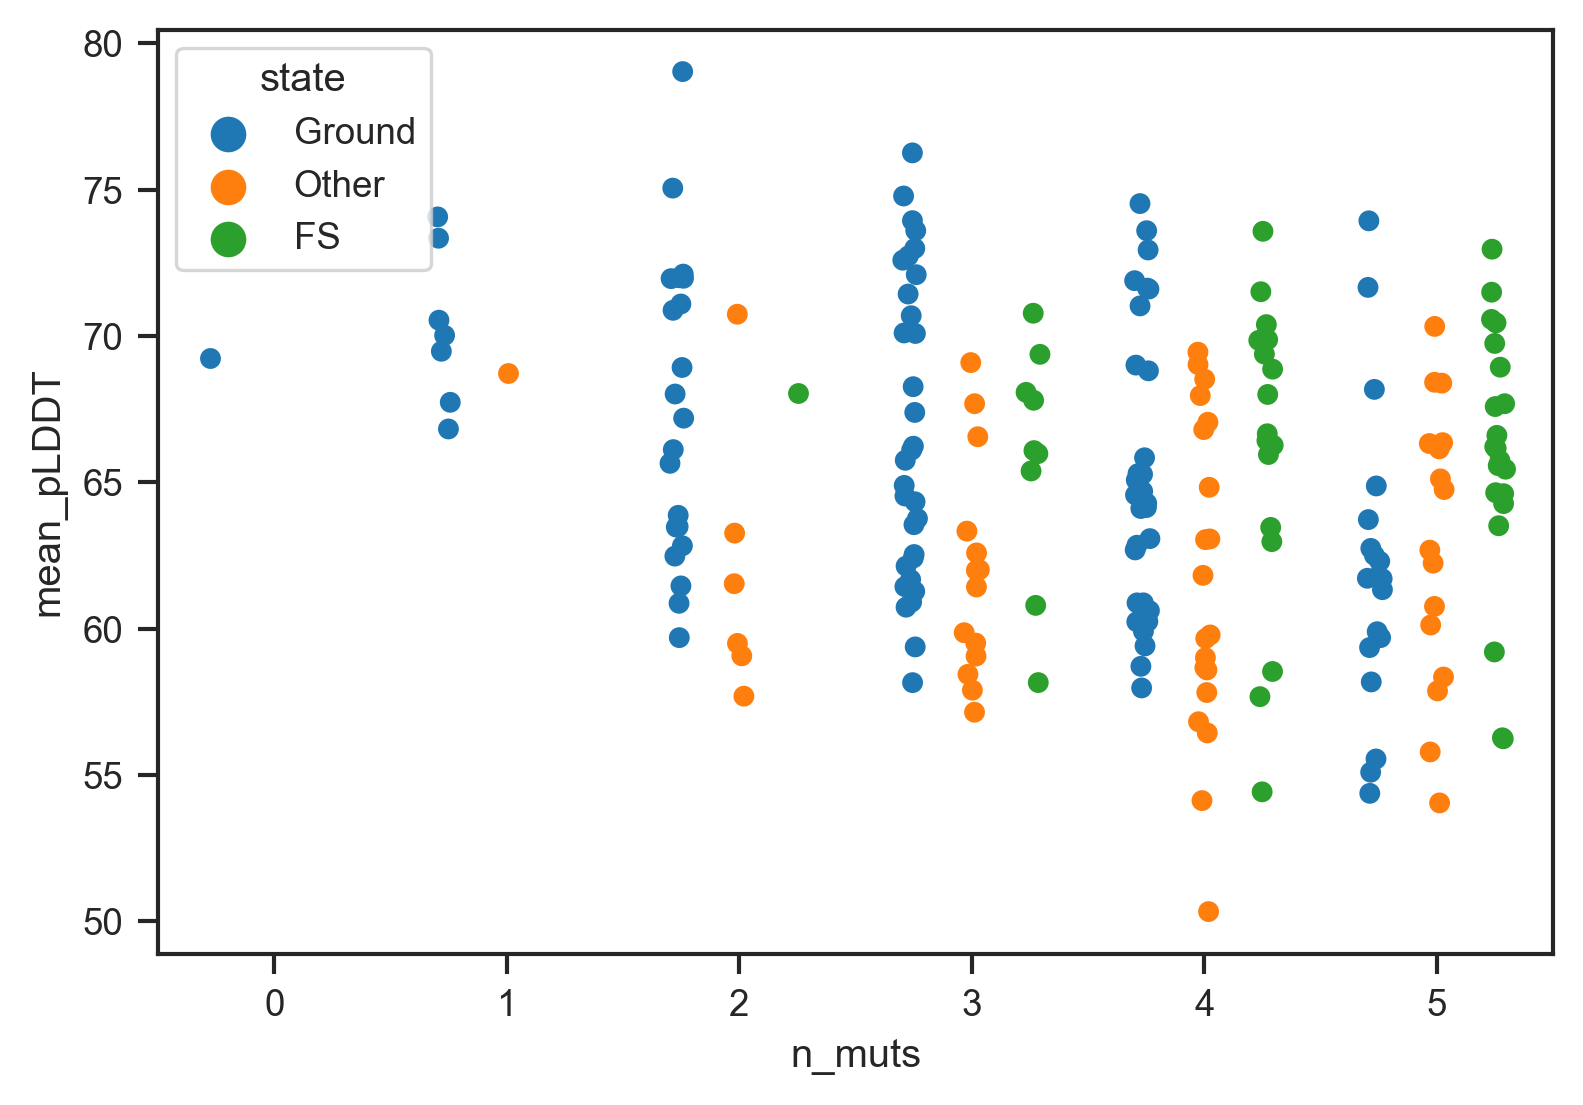

In [24]:
figure(figsize=(6,4))
sns.stripplot(x='n_muts',hue='state',y='mean_pLDDT', data=df,dodge=True)
savefig('plddt_of_combinations.pdf',bbox_inches='tight')

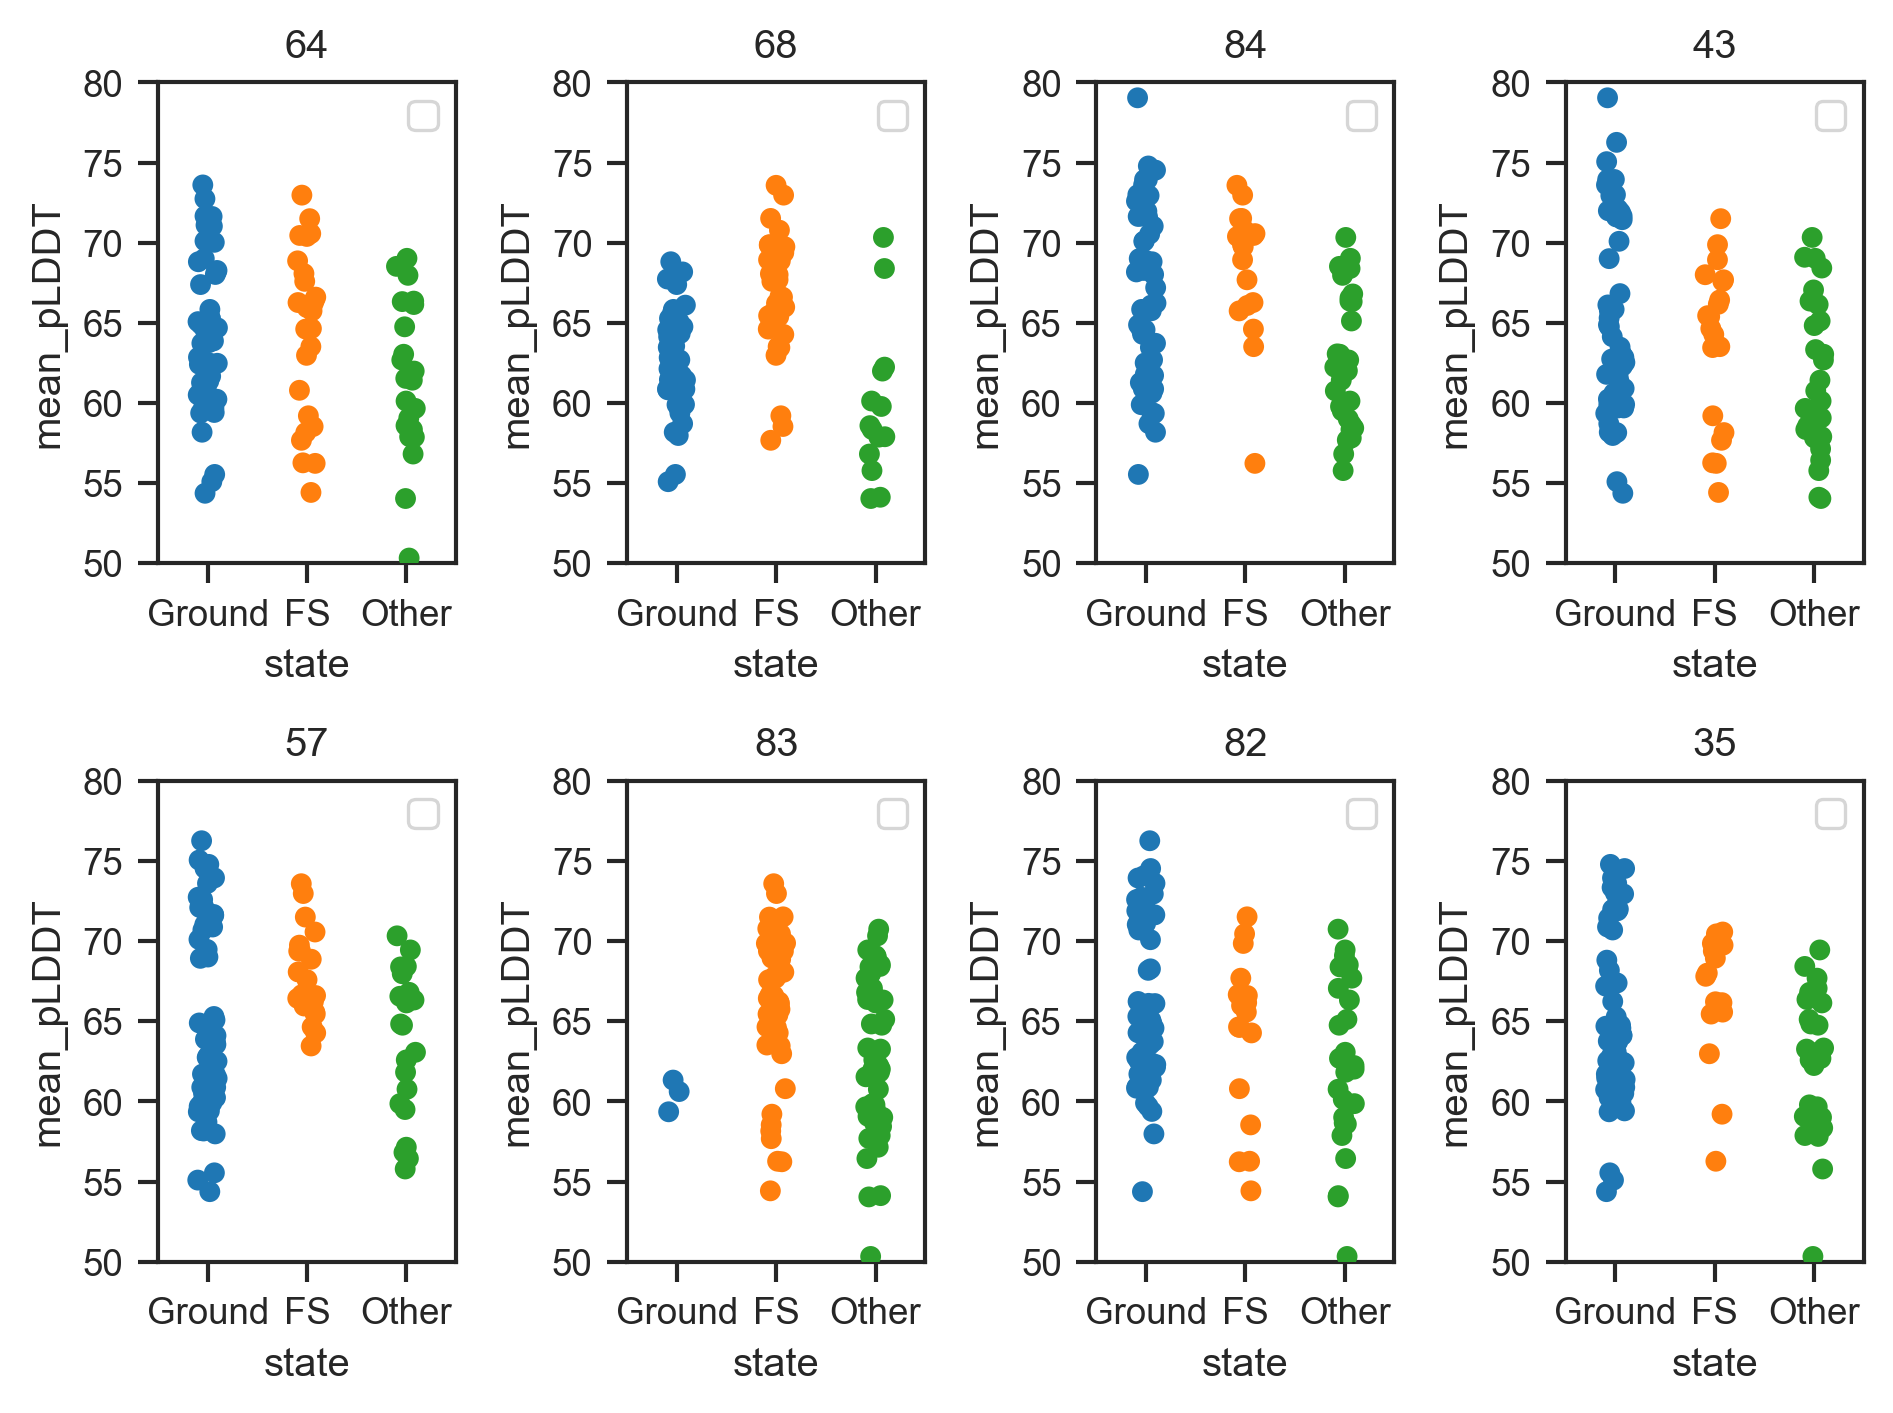

In [21]:
for i, m in enumerate(muts):
    tmp=[]
    for _, row in df.iterrows():
        if str(m) in row['mut_list']:

            tmp.append(row)
            
    subplot(2,4,i+1)
    sns.stripplot(x='state',y='mean_pLDDT', data=pd.DataFrame.from_records(tmp),
                  order=['Ground','FS','Other'],dodge=True)
    title(m)
    legend([])
    ylim([50,80])
    
    
tight_layout()


In [23]:
for _, row in df.loc[df.state=='FS'].sort_values('mean_pLDDT').iterrows():
    print("%.2f" % row['mean_pLDDT'], row['name'])

54.42 L64S_K43L_V83D_L82A
56.24 L64S_K43L_V83D_N84A_L82A
56.27 L64S_K43L_V83D_Y35C_L82A
57.68 L64S_I68R_K43L_V83D
58.16 L64S_K43L_V83D
58.54 L64S_I68R_V83D_L82A
59.20 L64S_I68R_K43L_V83D_Y35C
60.80 L64S_V83D_L82A
62.97 L64S_I68R_V83D_Y35C
63.46 I68R_K43L_V83D_I57T
63.52 L64S_I68R_K43L_V83D_N84A
64.27 I68R_K43L_V83D_I57T_L82A
64.61 L64S_I68R_V83D_N84A_L82A
64.65 L64S_K43L_V83D_I57T_L82A
65.39 I68R_K43L_V83D
65.45 I68R_K43L_V83D_I57T_Y35C
65.57 I68R_V83D_I57T_Y35C_L82A
65.75 L64S_I68R_V83D_N84A_Y35C
65.95 L64S_V83D_I57T_Y35C
65.98 I68R_V83D_L82A
66.09 L64S_V83D_N84A
66.16 I68R_K43L_V83D_Y35C_L82A
66.22 L64S_I68R_V83D_I57T_Y35C
66.27 L64S_I68R_V83D_N84A
66.43 L64S_K43L_V83D_I57T
66.61 L64S_I68R_V83D_I57T_L82A
66.66 I68R_V83D_I57T_L82A
67.59 L64S_I68R_K43L_V83D_I57T
67.69 I68R_K43L_V83D_N84A_L82A
67.81 I68R_V83D_Y35C
68.00 I68R_K43L_V83D_Y35C
68.06 I68R_V83D
68.08 L64S_V83D_I57T
68.87 L64S_I68R_V83D_I57T
68.94 I68R_K43L_V83D_N84A_Y35C
69.38 I68R_V83D_I57T
69.38 I68R_V83D_I57T_Y35C
69.75 I6